# ========================================================================================
# 2m_notebook_3
# ========================================================================================

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

В переменной df содержатся данные такого вида
Отберите из них только те, где wealth принимает значение 'medium', а возраст составляет больше 35.
Поместите результат в переменную medium_35.

In [2]:
df = pd.DataFrame({'client_id': np.random.randint(1, 10000, 30),
                   'sex': np.random.choice([0, 1], 30),
                   'wealth': np.random.choice(['low', 'medium', 'high'], 30),
                   'age': np.random.randint(20, 70, 30)})

In [8]:
df.head()

,client_id,sex,wealth,age,older_than_30
0,5093,1,high,27,False
1,6454,0,medium,37,True
2,5747,1,medium,62,True
3,5344,0,low,32,True
4,1207,1,low,27,False


In [4]:
medium_35 = df.loc[(df['wealth'] == 'medium') & (df['age'] > 35)]

Воспользуйтесь методом rename и приведите таблицу к более каноничному виду, сохранив её в ту же самую переменную df.

In [17]:
df_1 = df.rename(columns={'sex': 'Пол', 'wealth': 'Благосостояние', 'age': 'Возраст'})

In [18]:
df_1.head()

,client_id,Пол,Благосостояние,Возраст,older_than_30
0,5093,1,high,27,False
1,6454,0,medium,37,True
2,5747,1,medium,62,True
3,5344,0,low,32,True
4,1207,1,low,27,False


Добавьте в исследуемый нами датафрэйм df колонку older_than_30, в которой будет информация превышает ли значение переменной возраста 30 лет или нет (булево значение)`

In [19]:
df_1['older_than_30'] = df['age'] > 30

А теперь получите серию с числом уникальных значений для каждой колонки и присвойте её переменной unique_num.

In [20]:
unique_num = df_1.nunique()

In [21]:
unique_num

client_id         30
Пол                2
Благосостояние     3
Возраст           24
older_than_30      2
dtype: int64

У нас появились новые данные! Переменная data хранит в себе датафрэйм следующего вида:
Проведите inner join датафрейма data с df из предыдущего шага, объединив их по колонке client_id, и поместите результат в переменную full_data (да, придумывать названия переменных иногда бывает сложно)
Предыдущий датафрейм загружен в переменную df, новый – в data 

In [22]:
data = pd.DataFrame({'client_id': df_1.client_id.sample(10).values,
                   'amount': np.random.randint(1000, 100000, 10),
                   'date': np.random.randint(1585425000, 1585430000, 10)})

In [23]:
data.head()

,client_id,amount,date
0,8590,63418,1585428956
1,8503,84302,1585427389
2,115,75696,1585429394
3,1664,13144,1585425320
4,5551,3884,1585428691


In [24]:
full_data = df.merge(data, on = 'client_id')

In [25]:
full_data.head()

,client_id,sex,wealth,age,older_than_30,amount,date
0,5093,1,high,27,False,47996,1585426883
1,1863,0,medium,50,True,78658,1585426425
2,8503,1,low,27,False,84302,1585427389
3,115,1,high,64,True,75696,1585429394
4,8590,1,low,57,True,63418,1585428956


Теперь давайте создадим собственную функцию. Напишите функцию read_n_agg, которая:
1.	принимает на вход один параметр – путь к файлу
2.	при помощи переданного пути, считывает файл, в котором разделителем является ;
3.	считает средний заработок (income) по каждой компании (company), перенося колонку company в индекс (as_index=True)
4.	возвращает результат этих действий (агрегированный датафрэйм)
Данные выглядят вот так, скачать можно от.
P.S. Небольшое уточнение – менять что-то в данных или переименовывать колонки не нужно.
P.P.S. В задании надо указать только функцию, указывать конкретный путь к файлу не нужно. Он будет содержаться в аргументе функции внутри системы LMS!

In [26]:
def read_n_agg(path):
    df = pd.read_csv(path, sep=';')
    return df.groupby('company').agg({'income': 'mean'})


Импортируйте pandas как pd. В данном задании ссылка на датасет находится в переменной path_to_file. 
Загрузите датасет, используя ; в качестве разделителя. 
Также укажите, что столбцы start_at, end_at, arrived_at нужно прочитать как даты (параметр parse_dates).
Результат запишите в переменную taxi.

In [18]:
taxi = pd.read_csv(r'C:\Users\PC\Desktop\Софт\Simulation\Simulation\data\3_taxi_peru.csv', parse_dates=['start_at', 'end_at', 'arrived_at'], encoding='windows-1251', sep=';')

In [27]:
taxi = pd.read_csv(r'F:\!PR\Simulation\data\3_taxi_peru.csv', parse_dates=['start_at', 'end_at', 'arrived_at'], encoding='windows-1251', sep=';')

In [28]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


Проверьте, с какой платформы было сделано больше всего заказов. В ответе укажите значение в %, округлённое до целого.

In [45]:
np.round(taxi.source.value_counts() / len(taxi) * 100)

source
iPhone     42.0
web        33.0
Android    21.0
iPad        2.0
Wap         1.0
Name: count, dtype: float64

In [29]:
(taxi.source.value_counts() / len(taxi) * 100).round()

source
iPhone     42.0
web        33.0
Android    21.0
iPad        2.0
Wap         1.0
Name: count, dtype: float64

Чтобы показать разницу более наглядно, попробуем визуализировать показатели.
Агрегируйте данные и постройте барчарт, где по оси x будет расположено название платформы (source), а по оси y – количество заказов (абсолютные значения).
Какой график получился?

In [30]:
source_score = taxi.source.value_counts().reset_index()
source_score.columns = ['source', 'count']
source_score

,source,count
0,iPhone,9741
1,web,7631
2,Android,4909
3,iPad,571
4,Wap,136


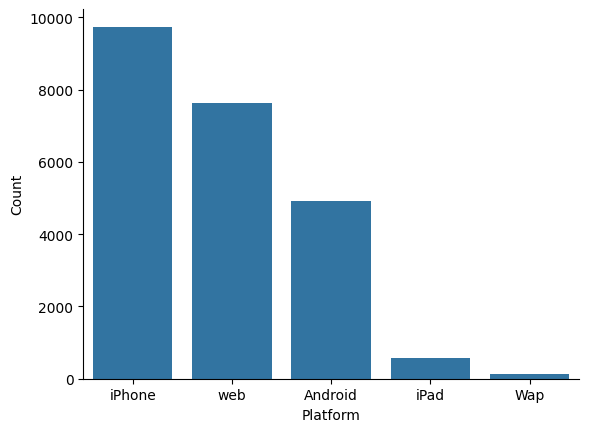

In [31]:
ax = sns.barplot(x='source', y="count", data=source_score)
ax.set(xlabel='Platform', ylabel='Count')  # подписываем оси
sns.despine()  # убрать часть рамки графика

Альтернативный вариант построения распределения категориальной переменной – sns.countplot. В качестве единственного аргумента можно передать всего одну колонку: например, source, а количество значений для оси y функция посчитает самостоятельно.
sns.countplot(taxi['source'])
Используйте данный тип графика и проверьте, какой тип поездки (icon) встречался чаще всего.

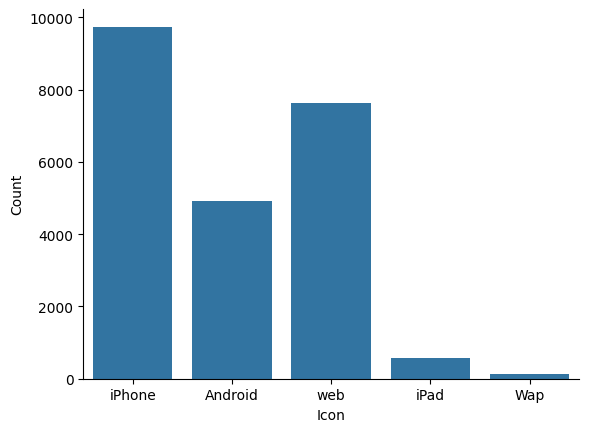

In [34]:
a = sns.countplot(x='source', data=taxi)
a.set(xlabel='Icon', ylabel='Count') # подписываем оси
sns.despine()  # убрать часть рамки графика

С помощью sns.countplot и параметра hue визуализируйте распределение переменной end_state (итоговое состояние заказа) в разбивке по платформам (source).
Иными словами, по оси x расположите платформу, а в качестве цвета используйте состояние заказа. Далее выберите верные утверждения.

<Axes: xlabel='source', ylabel='count'>

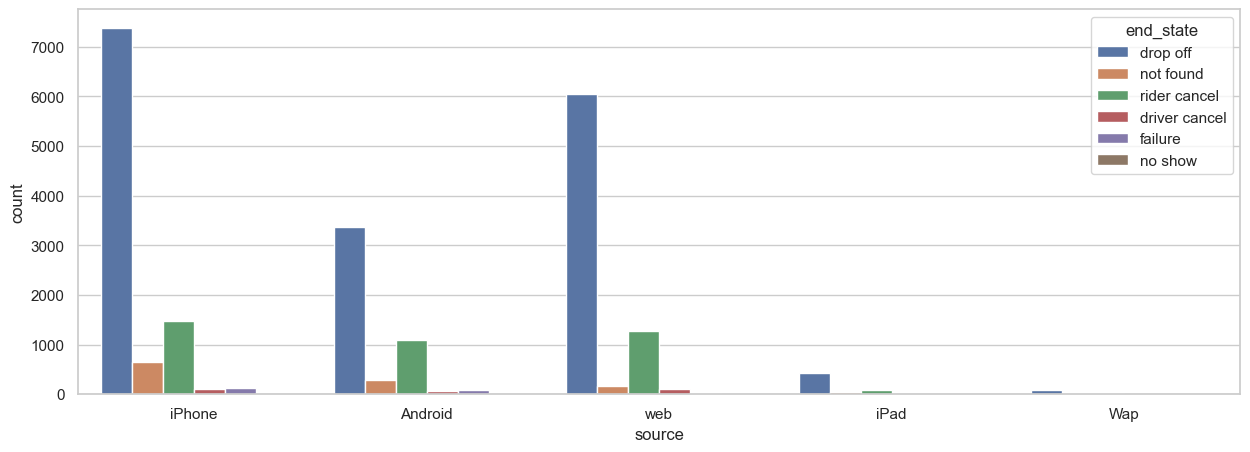

In [80]:
plt.figure(figsize=(15,5))  # указываем размер графика, чтобы он был побольше
sns.countplot(x='source', hue='end_state', data=taxi)

Проверим, как распределены оценки водителей (driver_score). Для подготовки данных выполните следующие шаги:
1.	Посчитайте частоту встречаемости каждой из оценок
2.	Переведите в проценты и округлите до 2 знаков после точки (.mul(100).round(2))
3.	Сбросьте индексы
4.	Переименуйте колонки в driver_score и percentage
5.	Отсортируйте по driver_score в порядке возрастания (от 0 до 5)
6.	Запишите результат в driver_score_counts
 
Полезные функции:
•	.mul() – умножение, более удобный вариант для использования в цепочке методов 
•	.round() – округление
•	.reset_index() – сбросить индекс
•	.value_counts() – сколько раз встречается каждое значение переменной

In [35]:
driver_score_counts = (taxi.driver_score.value_counts() / len(taxi))\
    .mul(100)\
    .round(2)\
    .reset_index()\
    .rename(columns={'driver_score': 'driver_score', 'count': 'percentage'})\
    .sort_values('driver_score')

In [37]:
driver_score_counts.percentage.sum()

np.float64(33.1)

In [38]:
print("Пропущенных значений:", taxi.driver_score.isnull().sum())

Пропущенных значений: 15461


In [36]:
driver_score_counts

,driver_score,percentage
2,0.0,4.73
4,1.0,0.41
5,2.0,0.27
3,3.0,0.98
1,4.0,7.24
0,5.0,19.47


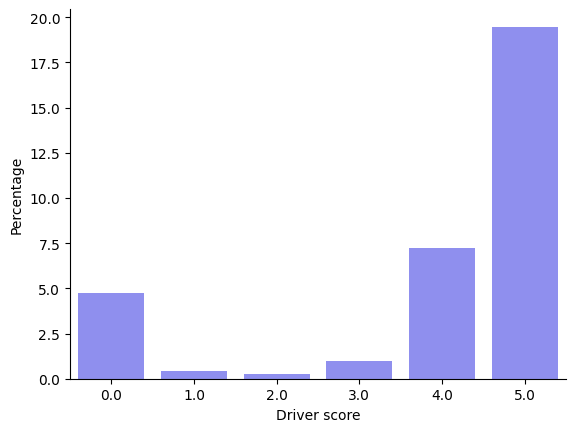

In [39]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

Проделайте аналогичные шаги для rider_score (оценок клиентов водителями), не забыв построить график.

In [40]:
rider_score_counts = (taxi.rider_score.value_counts() / len(taxi))\
    .mul(100)\
    .round(2)\
    .reset_index()\
    .rename(columns={'ridre_score': 'rider_score', 'count': 'percentage'})\
    .sort_values('rider_score')

In [41]:
rider_score_counts

,rider_score,percentage
2,0.0,1.52
4,1.0,0.14
5,2.0,0.13
3,3.0,0.92
1,4.0,5.88
0,5.0,58.00


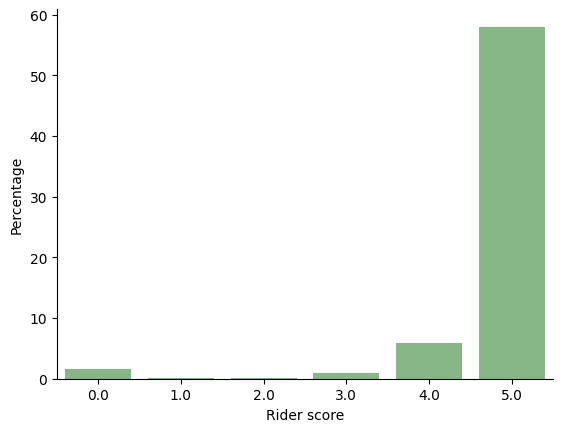

In [42]:
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='green', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()